# Mrežni filtar

Ovo je primjer frekvencijske karakteristike filtra.

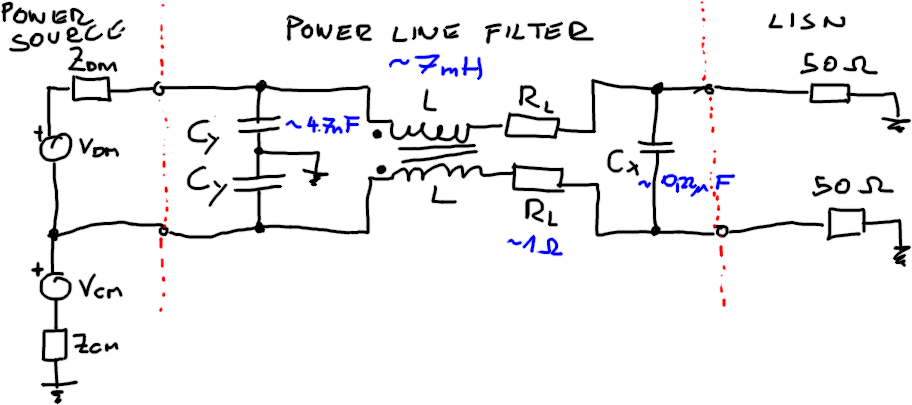

Uneseni gubici za zajedničke (CM) smetnje:

$IL_{CM}=(\frac{2Z_{Cy}}{2Z_{Cy}+Z_{in}})(\frac{R_L/L}{j\omega+R_L/L})$ [dB], uz pretpostavku da je $R_{LISN}>>R_L$. Ekvivalentni otpor LISN-a za CM smetnje iznosi 25 $\Omega$. Frekvencija na kojoj se počinju potiskivati zajedničke smetnje iznosi $\omega_{CM}=\frac{R_L}{L}$


Uneseni gubici za diferencijske (DM) smetnje:

$IL_{DM}=\frac{2R_{LISN}||Z_{Cx}}{2Z_{L}+2R_{LISN}||Z_{Cx}}$ [dB]. Ekvivalentni otpor LISN-a za DM smetnje iznosi 100 $\Omega$.

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons

# define filter parameters
Cx = 0.22e-6
L = 7e-3
Cy = 4700e-12
RL = 0.1

# LISN parameters
RLISN = 50

# frequency range
fmin = 1
fmax = 30e6
fstepno = 200
#f = np.linspace(fmin, fmax, num=fstepno)
f = np.logspace(np.log10(fmin), np.log10(fmax), num=fstepno)

# power source impedance
Cin_CM = 1e-9
Lin_DM = 1e-9
Zin_CM = 1j*2*np.pi*f*Cin_CM
Zin_DM = 1j*2*np.pi*f*Lin_DM

In [95]:
%matplotlib qt

def IL_CM(Cy,RL,L,f):
    # insertion loss for CM (VCMsource/VCMload)
    ZCy_CM = 1/(1j*2*np.pi*f*2*Cy)
    temp = (ZCy_CM/(ZCy_CM+Zin_CM))*(RL/L)/(1j*2*np.pi*f+RL/L)
    return -20*np.log10(np.abs(temp))

def IL_DM(Cx,RLISN,L,f):
    # insertion loss for DM (VDMsource/VDMload)
    ZCx_CM = 1/(1j*2*np.pi*f*Cx)
    Z_out = 2*RLISN*ZCx_CM/(2*RLISN+ZCx_CM)
    temp = Z_out/(Z_out+1j*2*np.pi*f*2*L)
    return -20*np.log10(np.abs(temp))        

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.45)
l1, = plt.plot(f, IL_CM(Cy,RL,L,f), lw=2, color='red')
l2, = plt.plot(f, IL_DM(Cx,RLISN,L,f), lw=2, color='blue')
ax.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Insertion loss [dB]')
plt.legend(('CM', 'DM'),loc='upper center', shadow=True)

axcolor = 'lightgoldenrodyellow'
axCx = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
sCx = Slider(axCx, 'Cx [uF]', 0.1, 1.0, valinit=Cx*1e6, valstep=0.01)

axCy = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
sCy = Slider(axCy, 'Cy [nF]', 0.1, 5.0, valinit=Cy*1e9, valstep=0.1)

axL = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
sL = Slider(axL, 'L [mH]', 0.001, 10, valinit=L*1e3, valstep=0.1)

axRL = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
sRL = Slider(axRL, 'RL [Ohm]', 0.001, 1, valinit=RL, valstep=0.1)

def update(val):
    Cx = sCx.val/1e6
    Cy = sCy.val/1e9
    L = sL.val/1e3
    RL = sRL.val    
    
    l1.set_ydata(IL_CM(Cy,RL,L,f))
    l2.set_ydata(IL_DM(Cx,RLISN,L,f))
            
    fig.canvas.draw_idle()
sCx.on_changed(update)
sCy.on_changed(update)
sL.on_changed(update)
sRL.on_changed(update)

plt.show()